In [15]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

In [16]:
df = pd.read_csv("unknown-tcp.csv", header=None, names=["time","val","span","1","2","3"])

In [17]:
print(df)

            time   val  span  1            2            3
0     1617462600  2581   600  0  2058.069842  3675.930158
1     1617463200  2661   600  0  2178.845373  3417.821294
2     1617463800  2585   600  0  2196.042200  3293.957800
3     1617464400  2544   600  0  2196.531567  3213.068433
4     1617465000  2349   600  0  2105.995412  3185.004588
...          ...   ...   ... ..          ...          ...
2010  1618668600  4147   600  0  3082.874245  8576.459088
2011  1618669200  4068   600  0  2952.459300  8629.207366
2012  1618669800  4112   600  0  2774.417774  8685.915559
2013  1618670400  4120   600  0  2582.268661  8732.898006
2014  1618671000  4046   600  0  2310.747608  8736.919059

[2015 rows x 6 columns]


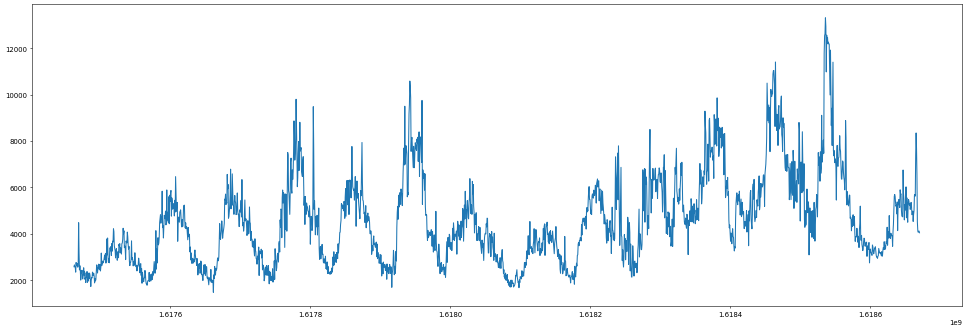

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

plt.figure(figsize=(24, 8), dpi=50)
plt.plot(df['time'], df['val'])
plt.show()

In [20]:
vals = np.expand_dims(df.val.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [21]:
np.bincount(hidden_states)

array([ 967, 1048], dtype=int64)

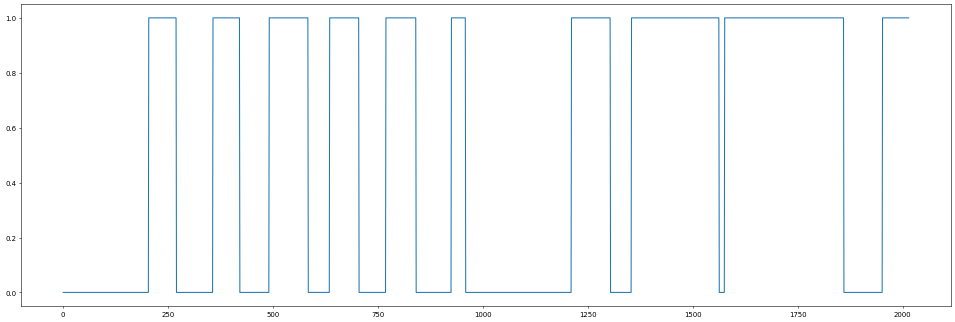

In [23]:
plt.figure(figsize=(24, 8), dpi=50)
plt.plot(hidden_states)

In [24]:
def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [26]:
hidden_states, mus, sigmas, transmat, model = fitHMM(df.val.values, 2)

[5994.18141812 3057.82580139]
[1646.54386303  721.05417086]


In [39]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots(figsize=(24, 8))

    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel('traffic', color=color)
    ax1.plot(time_vals, ts_vals, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()   
    plt.show()

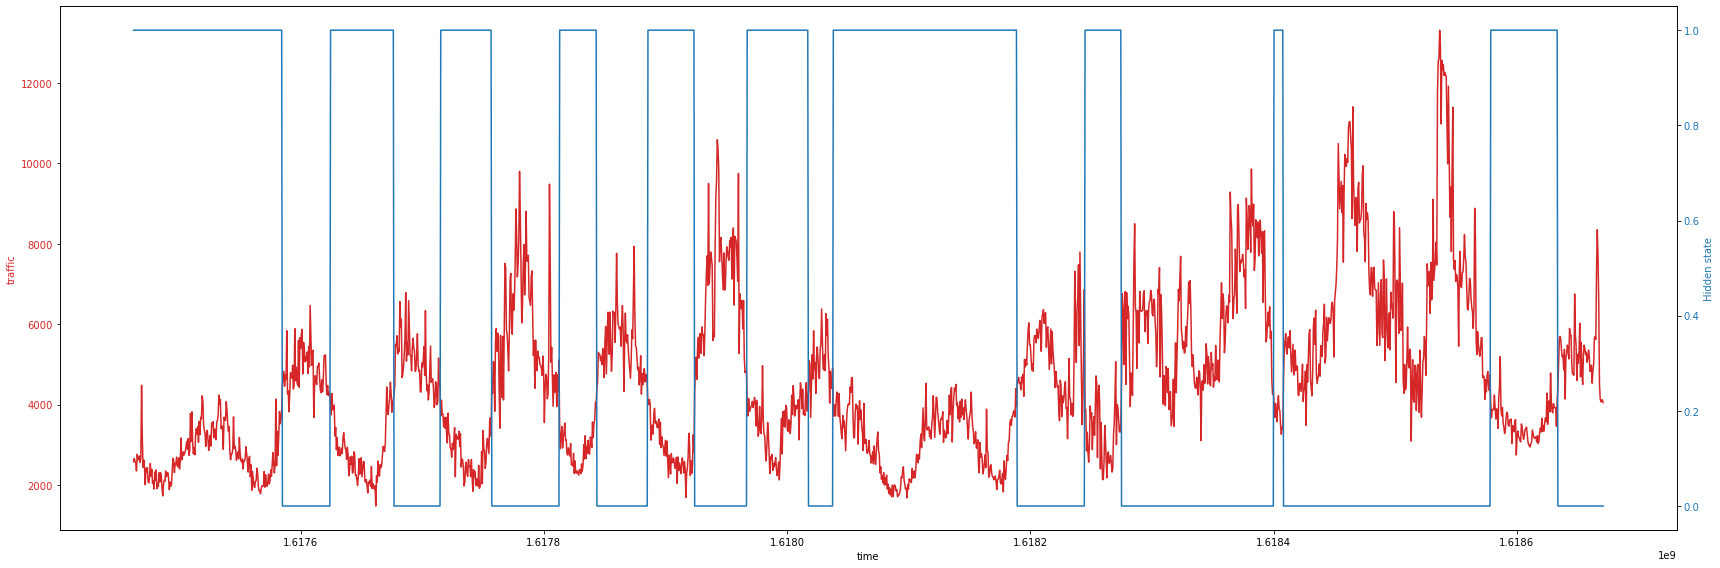

In [40]:
plot_states(df.val, hidden_states, df.time)

In [41]:
hidden_states, mus, sigmas, transmat, model = fitHMM(df.val.values, 3)

[2826.65102545 7361.50227377 4711.29694541]
[ 590.19070541 1578.88474388  706.55146225]


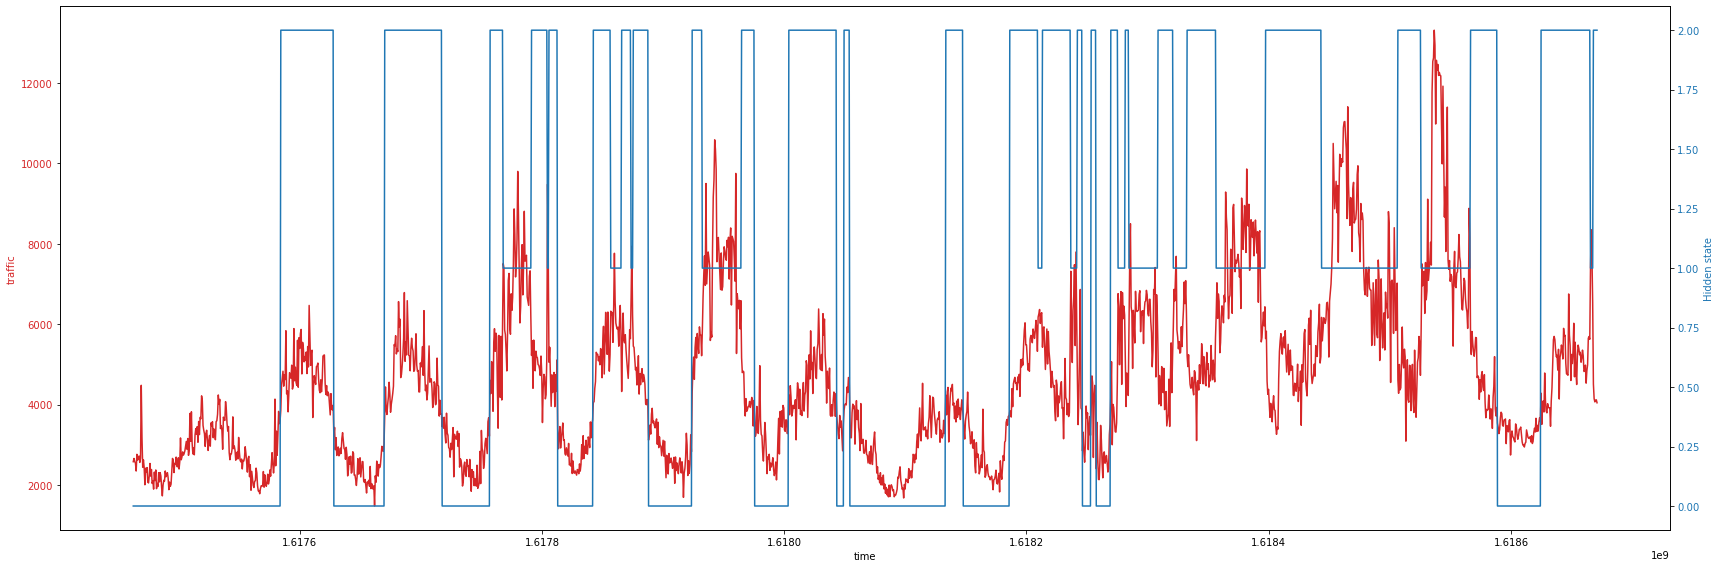

In [42]:
plot_states(df.val, hidden_states, df.time)

In [43]:
hidden_states, mus, sigmas, transmat, model = fitHMM(df.val.values, 4)

[5051.15131349 2433.7528584  7522.22771237 3613.01256925]
[ 624.55929579  363.22111837 1570.57172391  463.6954312 ]


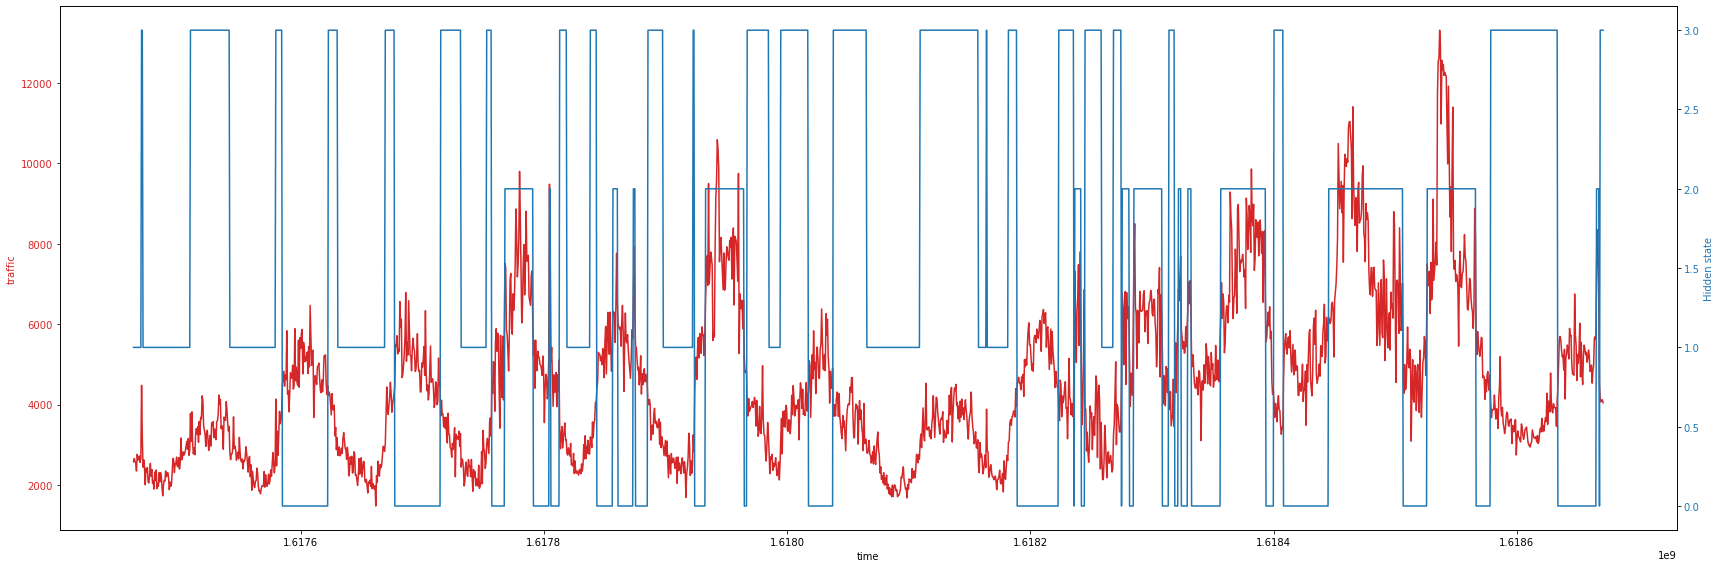

In [44]:
plot_states(df.val, hidden_states, df.time)

In [45]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [60]:
Q = df['val']

<ipython-input-61-6766b1331238>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(Q, freq=7)


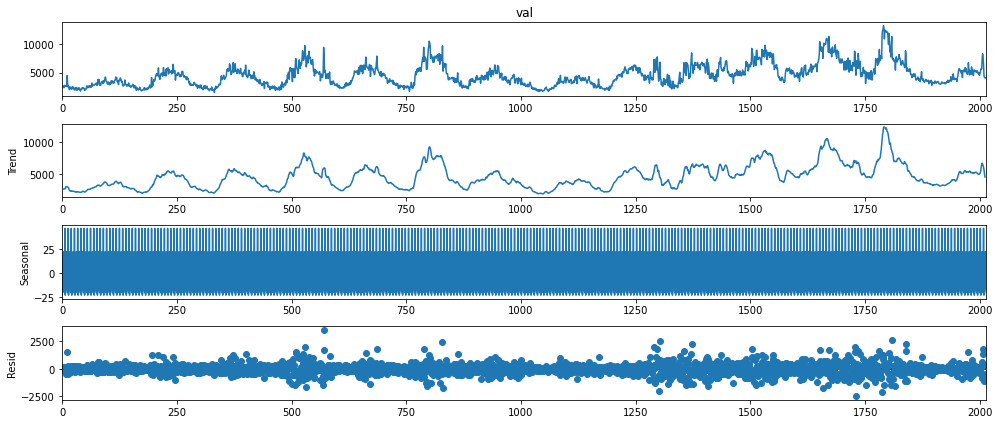

<Figure size 1200x400 with 0 Axes>

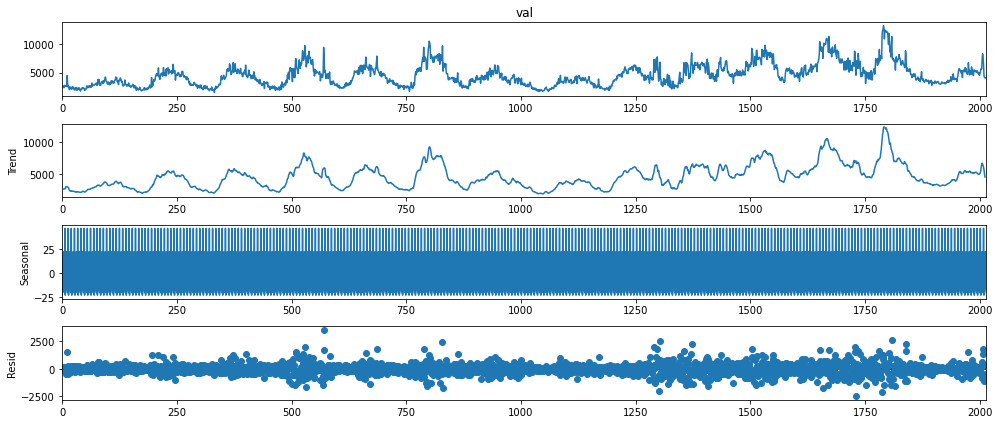

In [61]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(Q, freq=7)

plt.rcParams["figure.figsize"] = (14, 6)
plt.figure(figsize=(24, 8), dpi=50)
res.plot()

In [83]:
resid = res.resid
resid= pd.DataFrame({'resid': resid, 'date':Q.index})

In [90]:
vals = np.expand_dims(df.val.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)
np.bincount(hidden_states)

array([1048,  967], dtype=int64)

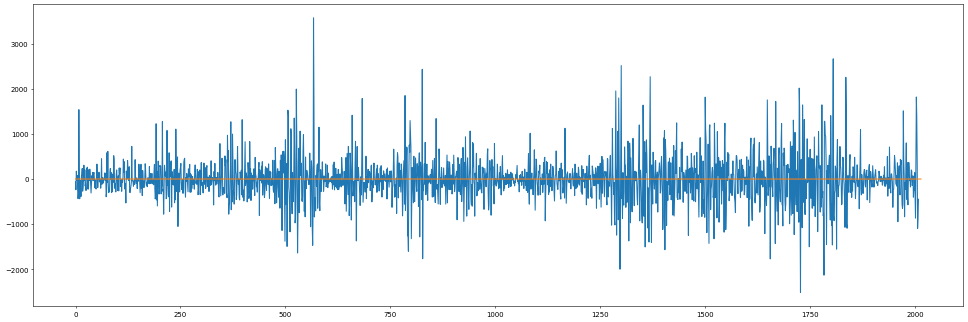

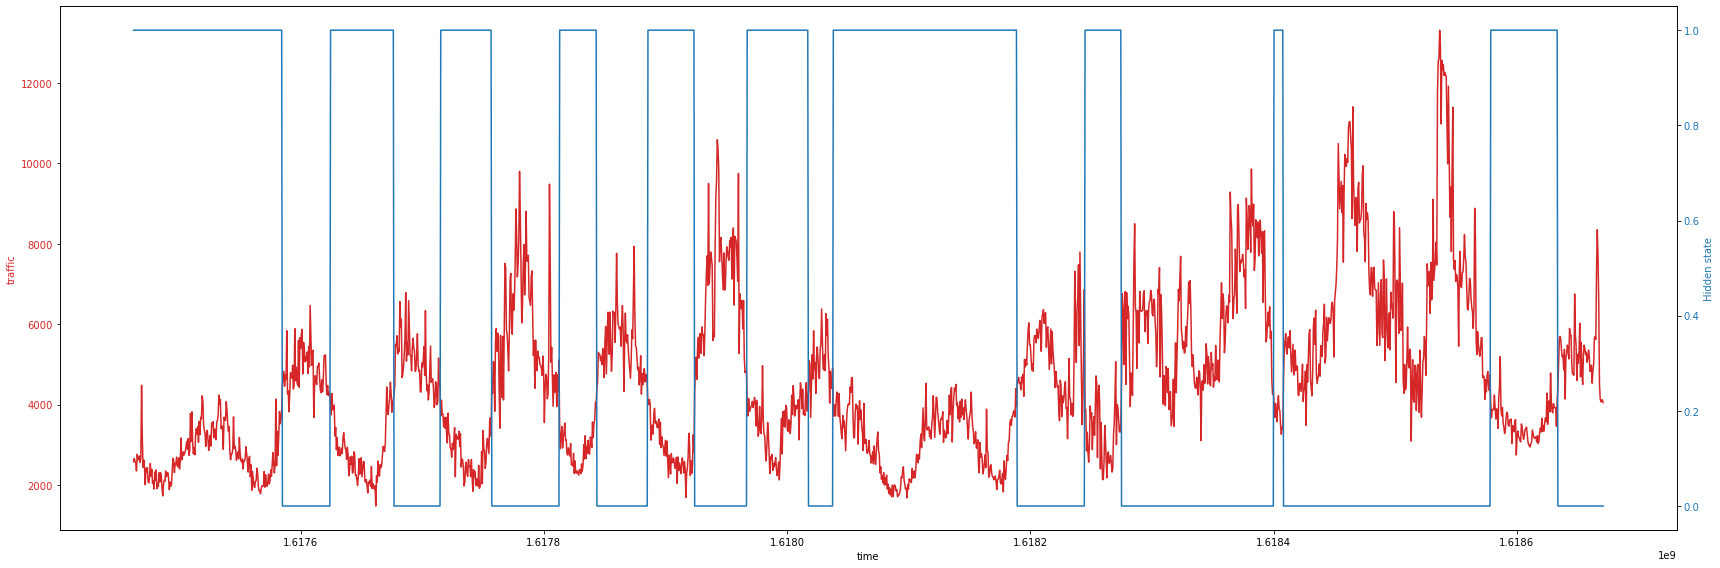

In [104]:

tmp = resid['resid'].dropna()
tmp2 = tmp.tolist()


trend = res.trend
trend = pd.DataFrame({'trend': trend, 'date':Q.index})

#print(trend['trend'].tolist())
tmp3 = trend['trend'].dropna()
tmp4 = tmp3.tolist()


plt.figure(figsize=(24, 8), dpi=50)
#plt.subplot(2, 1, 1)
#plt.title("resid")
plt.plot(tmp2)


plt.plot(hidden_states)

plot_states(df.val, hidden_states, df.time)